In [1]:
import os, math
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
train_variants_df = pd.read_csv("./data/training_variants")
test_variants_df = pd.read_csv("./data/test_variants")
train_text_df = pd.read_csv("./data/training_text", sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
test_text_df = pd.read_csv("./data/test_text", sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])

In [51]:
print('Genes in test: ', len(set(test_variants_df['Gene'])))
print('Genes in train: ', len(set(train_variants_df['Gene'])))
print('Genes in common: ', len(set(train_variants_df['Gene']) & set(test_variants_df['Gene'])))

Genes in test:  1397
Genes in train:  264
Genes in common:  154


In [149]:
gene_group = train_variants_df.groupby('Gene').size().sort_values(ascending=False)
top_genes = gene_group.keys()

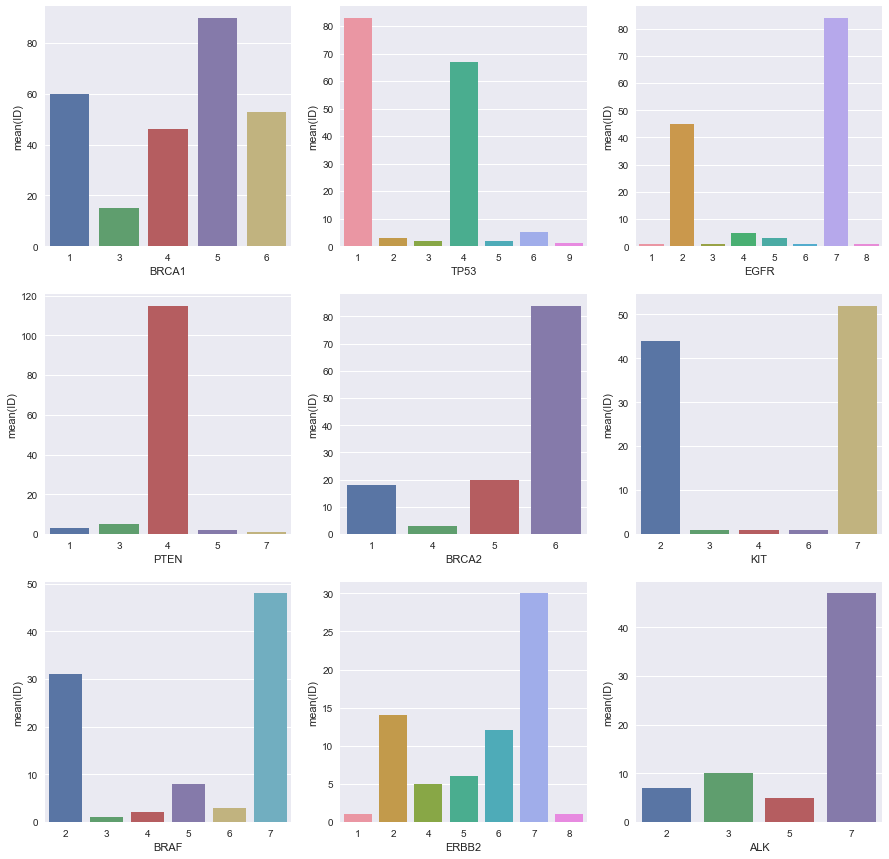

In [150]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        idx = i*3 + j
        class_groupby_gene = train_variants_df[train_variants_df['Gene'] == top_genes[idx]].groupby('Class')['ID'].count().reset_index()
        sorted_class = class_groupby_gene.sort_values('ID', ascending=False)
        subax = sns.barplot(x="Class", y="ID", data=sorted_class, ax=ax[i][j])
        subax.set(xlabel = top_genes[idx])